# 🟥🟩
# 🟦🟨
# Microsoft Stocks Price Prediction (LSTM) 📈 :-
## Time Series Forecasting 📉 :


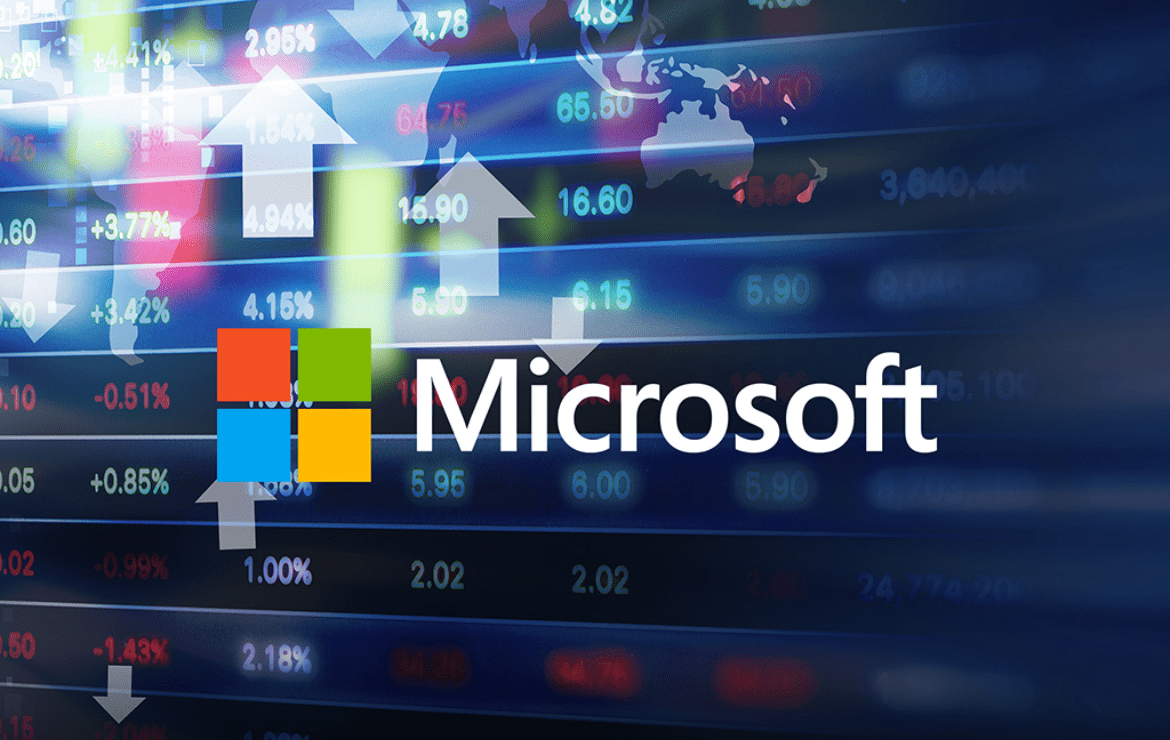

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\pasted image 0.png")

In [2]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
import statistics
import statsmodels
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
from datetime import datetime
import math
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pdr.get_data_tiingo('MSFT',api_key='59c37308a2009443660afe6970756ee6007d9710')
df.to_csv('Microsoft_stocks.csv')

In [5]:
df1=pd.read_csv('Microsoft_stocks.csv')
df1

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-07-10 00:00:00+00:00,102.12,102.51,101.8600,102.00,19293140,96.555299,96.924047,96.309467,96.441838,19293140,0.0,1.0
1,MSFT,2018-07-11 00:00:00+00:00,101.98,102.34,101.1000,101.15,19644648,96.422928,96.763311,95.590880,95.638156,19644648,0.0,1.0
2,MSFT,2018-07-12 00:00:00+00:00,104.19,104.41,102.7300,102.77,24335929,98.512501,98.720513,97.132059,97.169879,24335929,0.0,1.0
3,MSFT,2018-07-13 00:00:00+00:00,105.43,105.60,104.0900,104.37,24653500,99.684931,99.845667,98.417950,98.682692,24653500,0.0,1.0
4,MSFT,2018-07-16 00:00:00+00:00,104.91,105.82,104.5200,105.40,21786912,99.193267,100.053679,98.824519,99.656566,21786912,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,MSFT,2023-06-30 00:00:00+00:00,340.54,342.73,337.2000,337.75,26832756,340.540000,342.730000,337.200000,337.750000,26832756,0.0,1.0
1253,MSFT,2023-07-03 00:00:00+00:00,337.99,340.90,336.5710,339.19,12508692,337.990000,340.900000,336.571000,339.190000,12508692,0.0,1.0
1254,MSFT,2023-07-05 00:00:00+00:00,338.15,341.65,334.7276,335.09,18172378,338.150000,341.650000,334.727600,335.090000,18172378,0.0,1.0
1255,MSFT,2023-07-06 00:00:00+00:00,341.27,342.99,335.5000,337.30,28195534,341.270000,342.990000,335.500000,337.300000,28195534,0.0,1.0


In [6]:
df2=df1.iloc[:,1:8]
df2

,date,close,high,low,open,volume,adjClose
0,2018-07-10 00:00:00+00:00,102.12,102.51,101.8600,102.00,19293140,96.555299
1,2018-07-11 00:00:00+00:00,101.98,102.34,101.1000,101.15,19644648,96.422928
2,2018-07-12 00:00:00+00:00,104.19,104.41,102.7300,102.77,24335929,98.512501
3,2018-07-13 00:00:00+00:00,105.43,105.60,104.0900,104.37,24653500,99.684931
4,2018-07-16 00:00:00+00:00,104.91,105.82,104.5200,105.40,21786912,99.193267
...,...,...,...,...,...,...,...
1252,2023-06-30 00:00:00+00:00,340.54,342.73,337.2000,337.75,26832756,340.540000
1253,2023-07-03 00:00:00+00:00,337.99,340.90,336.5710,339.19,12508692,337.990000
1254,2023-07-05 00:00:00+00:00,338.15,341.65,334.7276,335.09,18172378,338.150000
1255,2023-07-06 00:00:00+00:00,341.27,342.99,335.5000,337.30,28195534,341.270000


In [7]:
df2['date'].nunique()

1257

In [8]:
df2.shape

(1257, 7)

In [9]:
df2.isnull().sum()

date        0
close       0
high        0
low         0
open        0
volume      0
adjClose    0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1257 non-null   object 
 1   close     1257 non-null   float64
 2   high      1257 non-null   float64
 3   low       1257 non-null   float64
 4   open      1257 non-null   float64
 5   volume    1257 non-null   int64  
 6   adjClose  1257 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [11]:
df2.set_index(df2['date'],inplace=True)
df2.drop(columns=['date'],axis=1,inplace=True)
df2

,close,high,low,open,volume,adjClose
date,,,,,,
2018-07-10 00:00:00+00:00,102.12,102.51,101.8600,102.00,19293140,96.555299
2018-07-11 00:00:00+00:00,101.98,102.34,101.1000,101.15,19644648,96.422928
2018-07-12 00:00:00+00:00,104.19,104.41,102.7300,102.77,24335929,98.512501
2018-07-13 00:00:00+00:00,105.43,105.60,104.0900,104.37,24653500,99.684931
2018-07-16 00:00:00+00:00,104.91,105.82,104.5200,105.40,21786912,99.193267
...,...,...,...,...,...,...
2023-06-30 00:00:00+00:00,340.54,342.73,337.2000,337.75,26832756,340.540000
2023-07-03 00:00:00+00:00,337.99,340.90,336.5710,339.19,12508692,337.990000
2023-07-05 00:00:00+00:00,338.15,341.65,334.7276,335.09,18172378,338.150000


## Data Decomposing :

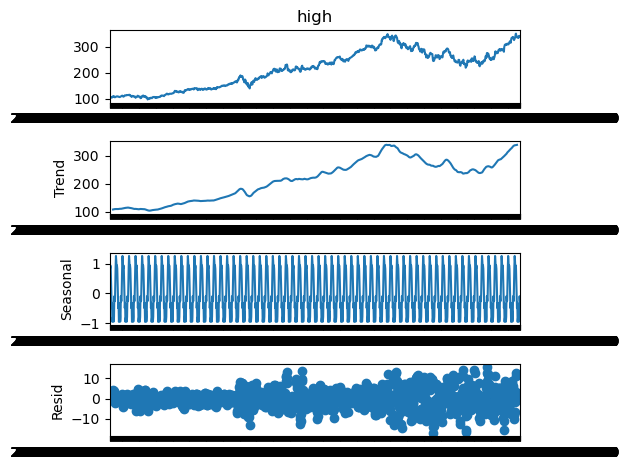

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
sdc=seasonal_decompose(df2['high'],period=20)
sdc.plot();

In [13]:
df2.index=pd.to_datetime(df2.index)

In [14]:
df2.index.dtype

datetime64[ns, UTC]

In [15]:
df2.describe()

,close,high,low,open,volume,adjClose
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000
mean,213.527745,215.708226,211.113326,213.436365,3.017945e+07,209.381285
std,71.791454,72.478607,71.024334,71.741277,1.281920e+07,72.679942
min,94.130000,97.970000,93.960000,95.140000,8.989150e+06,89.739436
25%,139.290000,140.610000,138.250000,139.760000,2.221416e+07,134.376951
50%,222.590000,225.630000,219.400000,222.690000,2.700998e+07,217.801173
75%,272.290000,276.140000,269.519100,272.670000,3.417605e+07,270.624021
max,348.100000,351.470000,342.200000,351.320000,1.112421e+08,348.100000


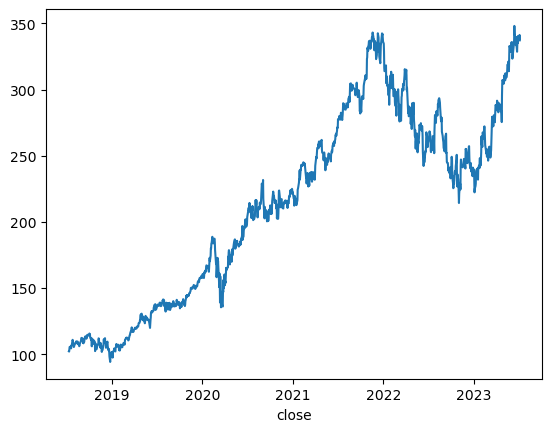

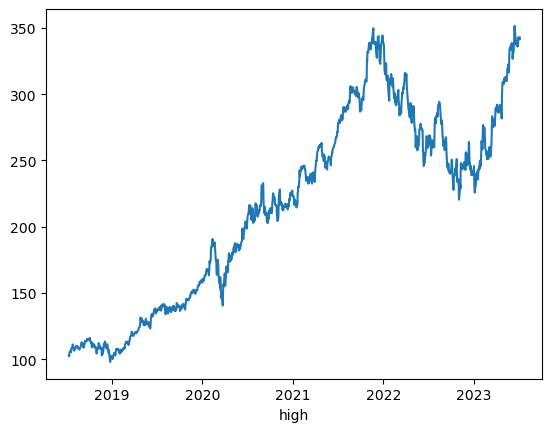

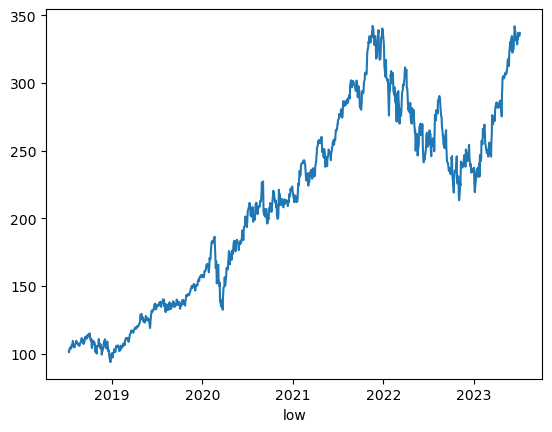

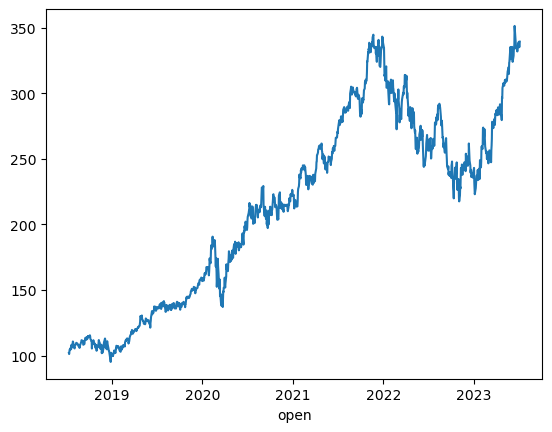

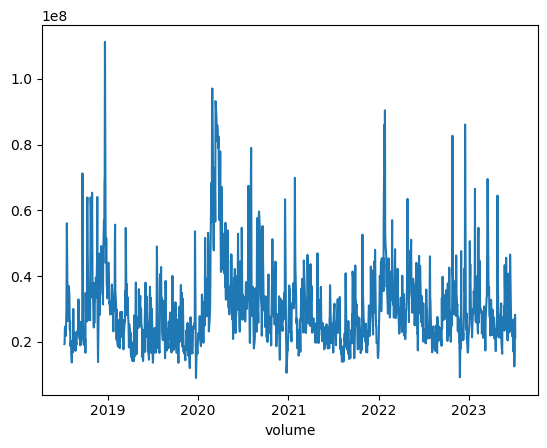

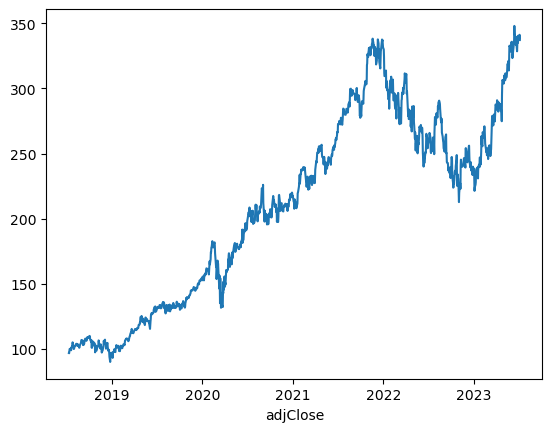

In [16]:
for i in df2.columns:
    plt.plot(df2[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.show()

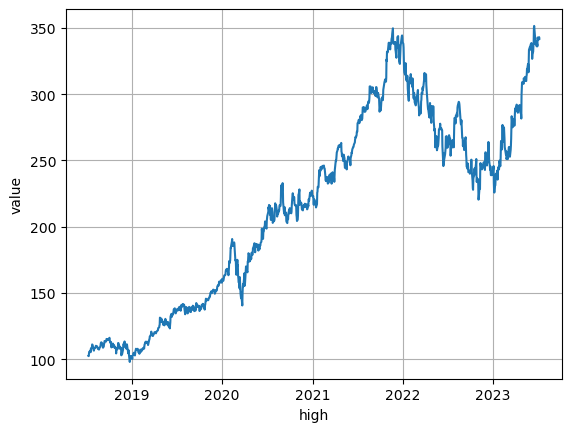

In [17]:
plt.plot(df2['high'])
plt.xlabel('High')
plt.ylabel('Value')
plt.grid()
plt.show()

<AxesSubplot:xlabel='high', ylabel='Density'>

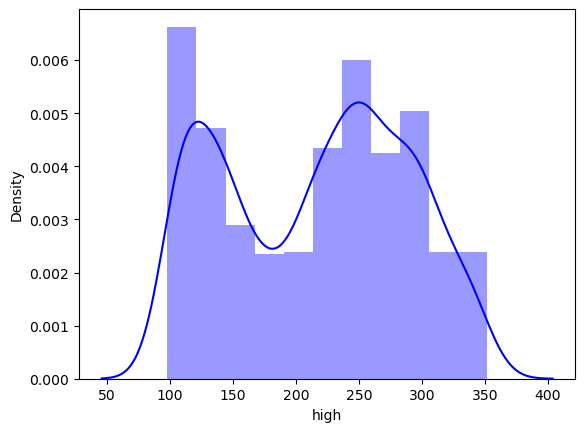

In [60]:
sns.distplot(df2['high'],color='blue')

## Day & Month Wise Stock Price :

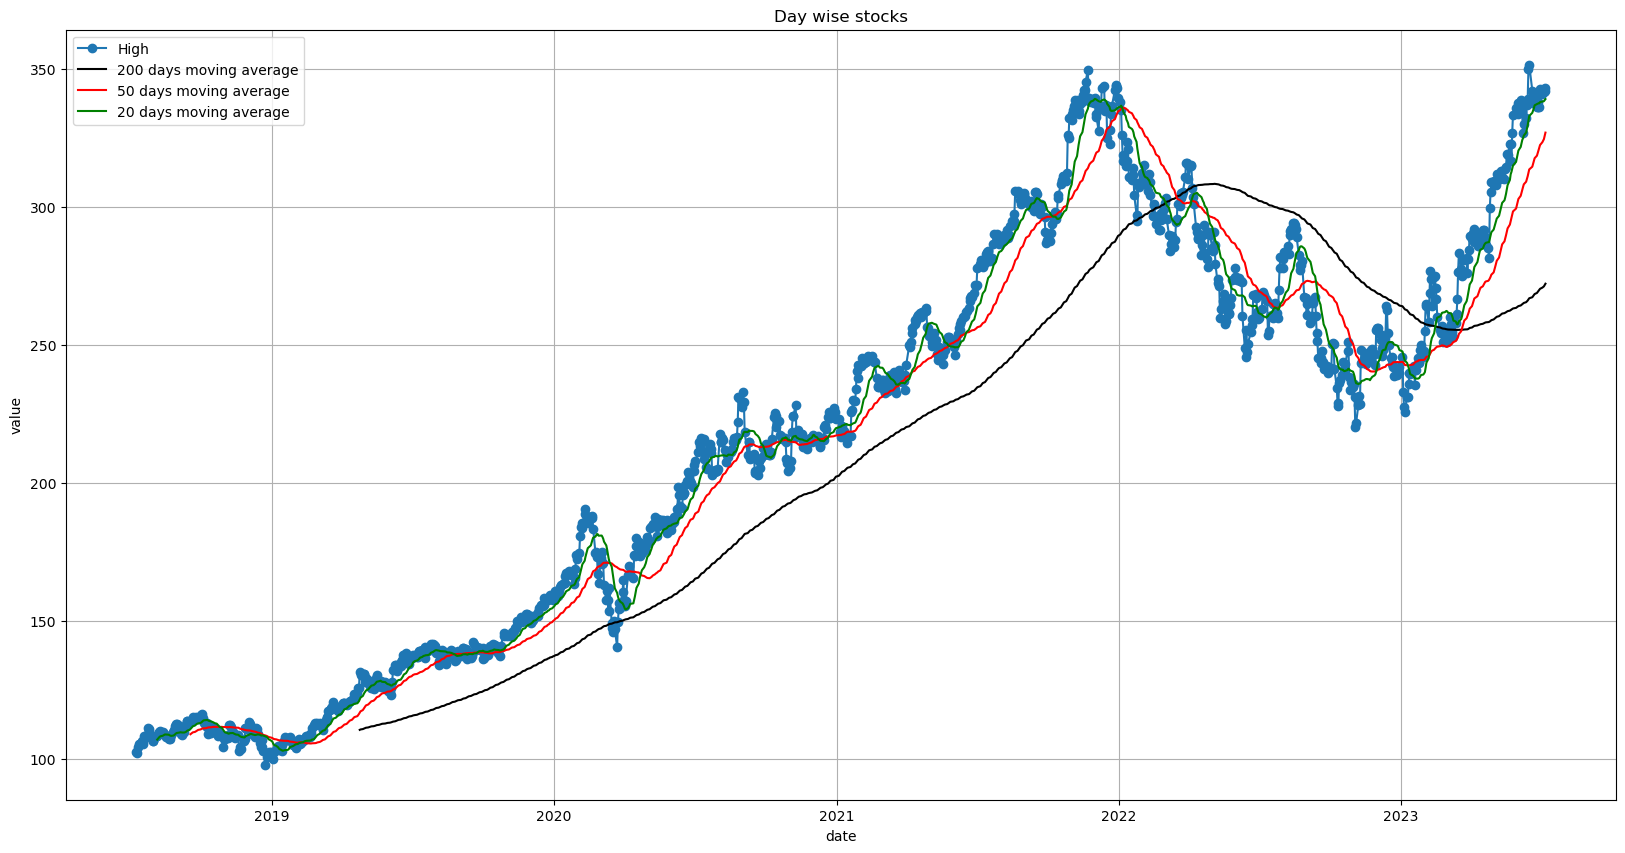

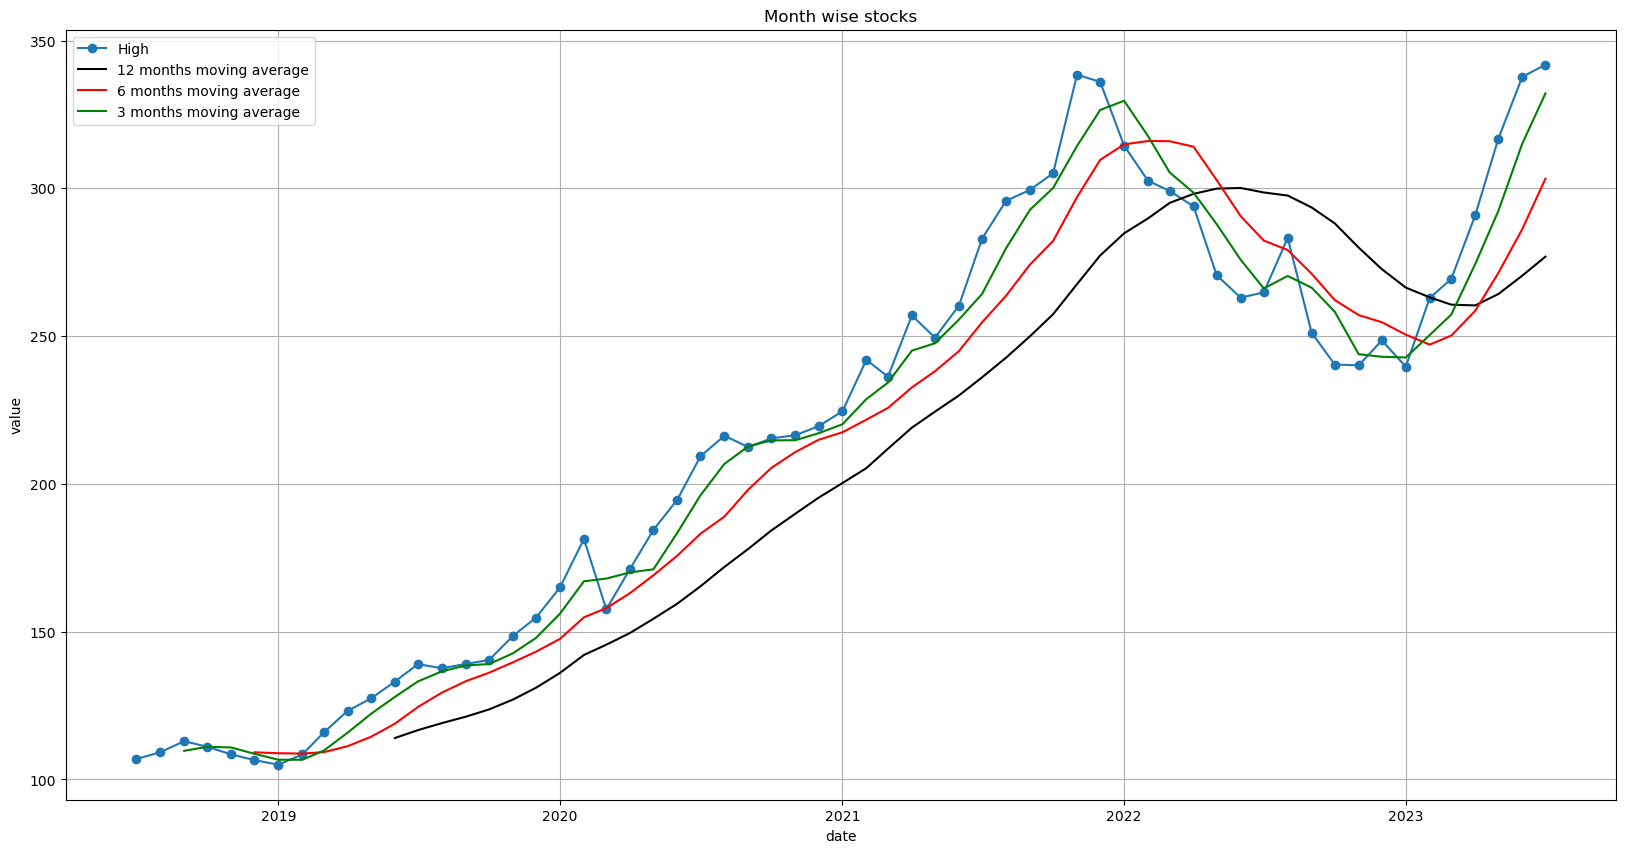

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df2.index,df2['high'],marker='o',label='High')
plt.plot(df2.index,df2['high'].rolling(200).mean(),color='black',label='200 days moving average')
plt.plot(df2.index,df2['high'].rolling(50).mean(),color='red',label='50 days moving average')
plt.plot(df2.index,df2['high'].rolling(20).mean(),color='green',label='20 days moving average')
plt.xlabel('date')
plt.ylabel('value')
plt.title('Day Wise Stocks :')
plt.grid()
plt.legend()
plt.show()
df3=df2.resample('MS').mean()
plt.figure(figsize=(20,10))
plt.plot(df3.index,df3['high'],marker='o',label='High')
plt.plot(df3.index,df3['high'].rolling(12).mean(),color='black',label='12 months moving average')
plt.plot(df3.index,df3['high'].rolling(6).mean(),color='red',label='6 months moving average')
plt.plot(df3.index,df3['high'].rolling(3).mean(),color='green',label='3 months moving average')
plt.xlabel('date')
plt.ylabel('value')
plt.title('Month Wise stocks :')
plt.grid()
plt.legend()
plt.show()

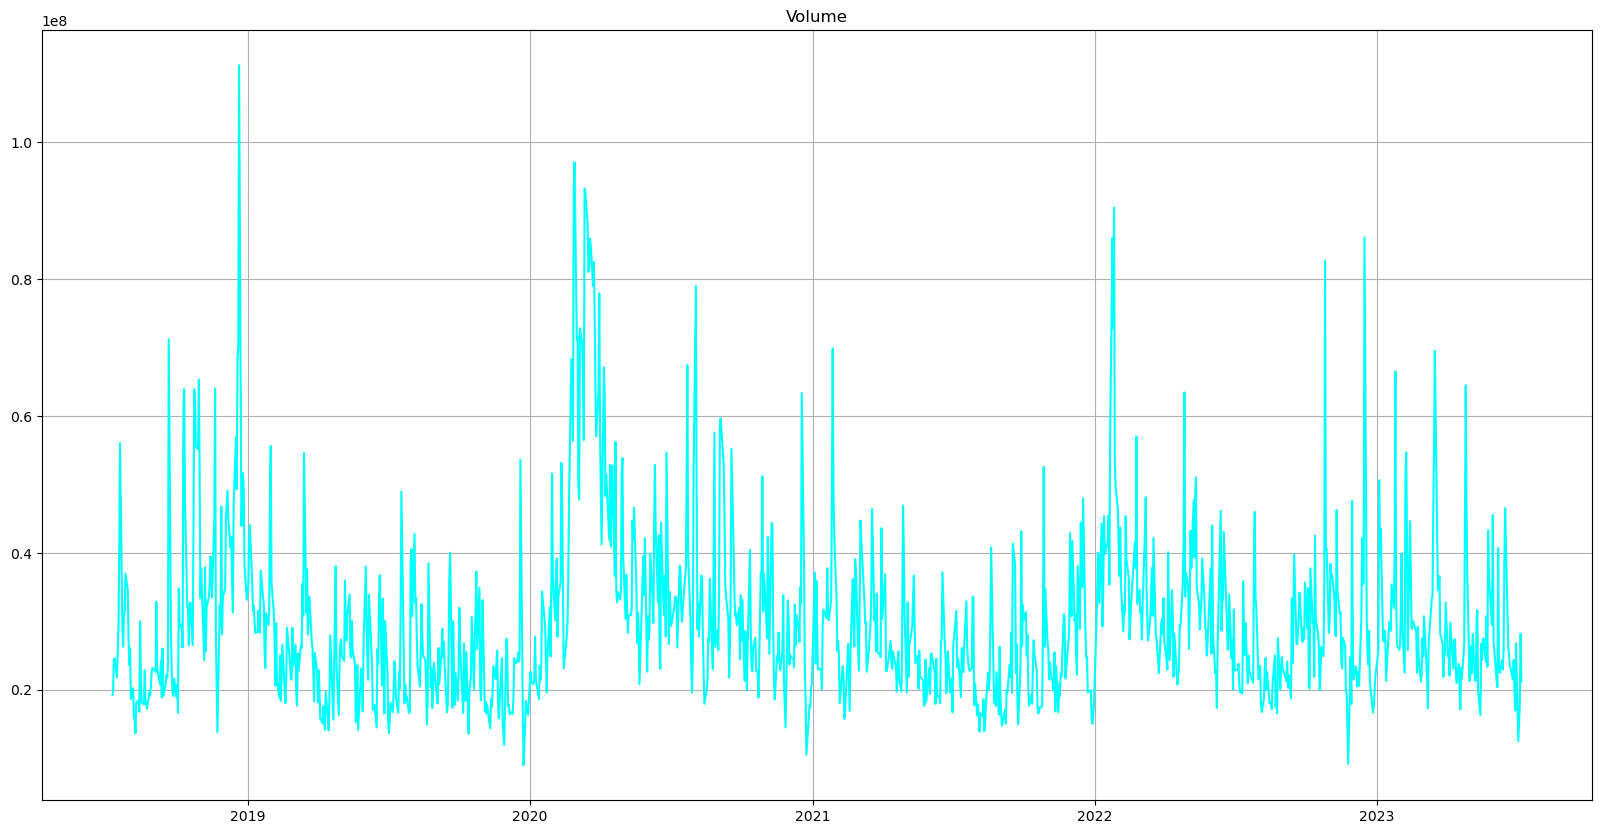

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df2.index,df2['volume'],color='cyan')
plt.title('Volume')
plt.grid()
plt.show()

## Daily Return : 

In [21]:
df4=pd.DataFrame(df2['high'].pct_change())
df4

,high
date,
2018-07-10 00:00:00+00:00,NaN
2018-07-11 00:00:00+00:00,-0.001658
2018-07-12 00:00:00+00:00,0.020227
2018-07-13 00:00:00+00:00,0.011397
2018-07-16 00:00:00+00:00,0.002083
...,...
2023-06-30 00:00:00+00:00,0.019696
2023-07-03 00:00:00+00:00,-0.005339
2023-07-05 00:00:00+00:00,0.002200


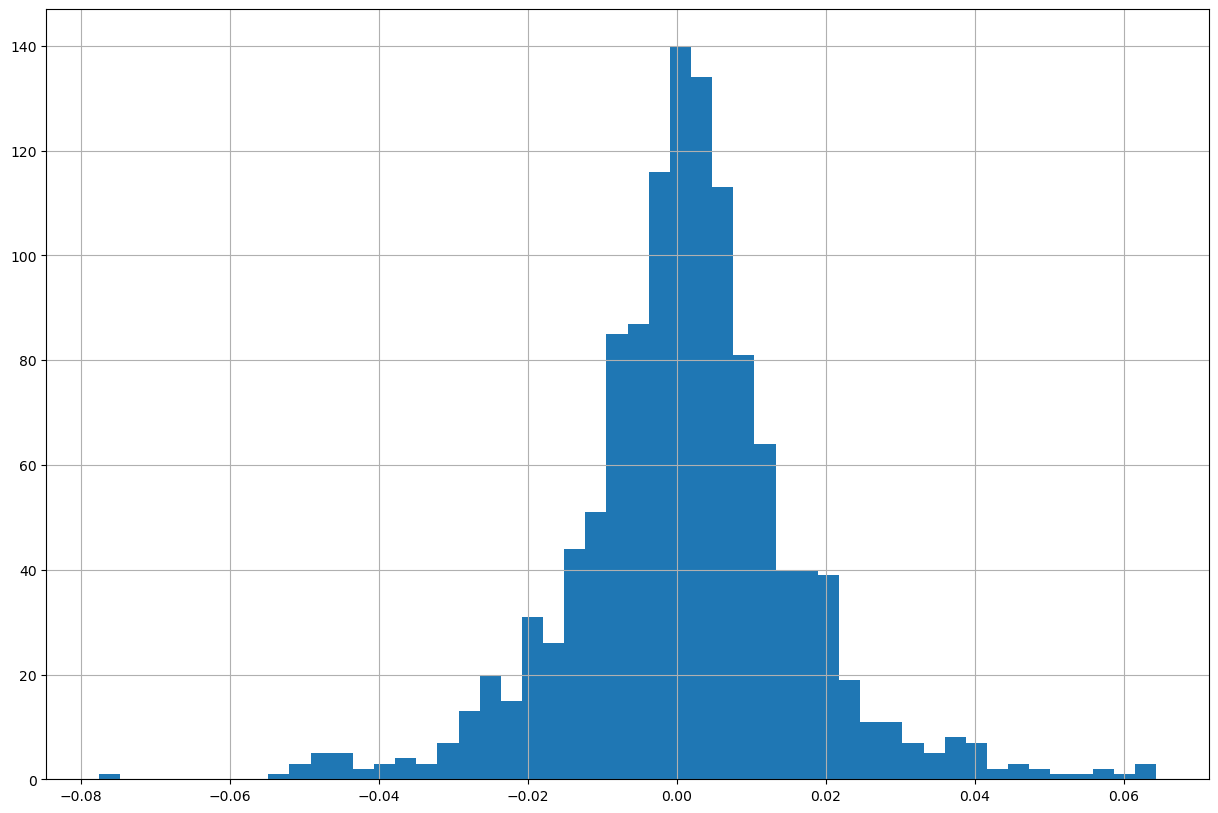

In [22]:
plt.figure(figsize=(15,10))
plt.hist(df4,bins=50)
plt.grid()
plt.show()

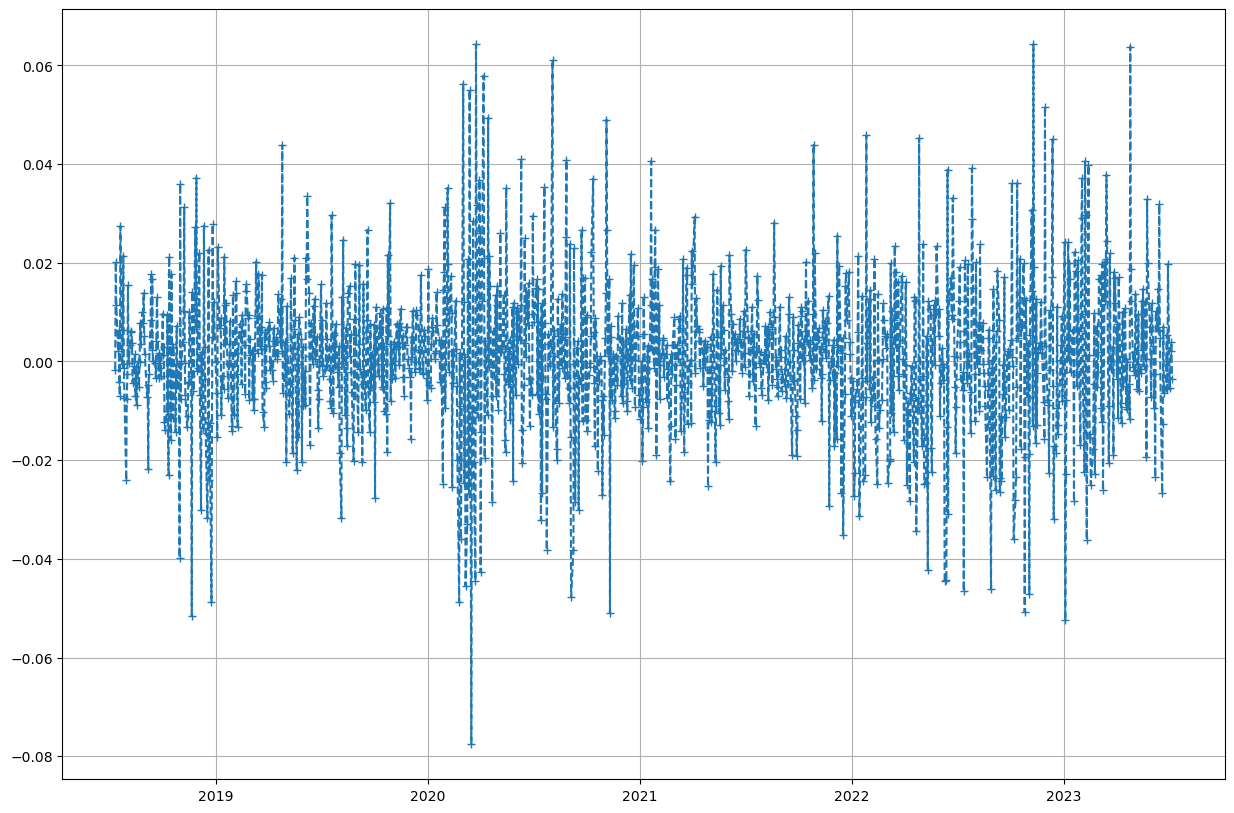

In [23]:
plt.figure(figsize=(15,10))
plt.plot(df4,linestyle='--',marker='+')
plt.grid()
plt.show()

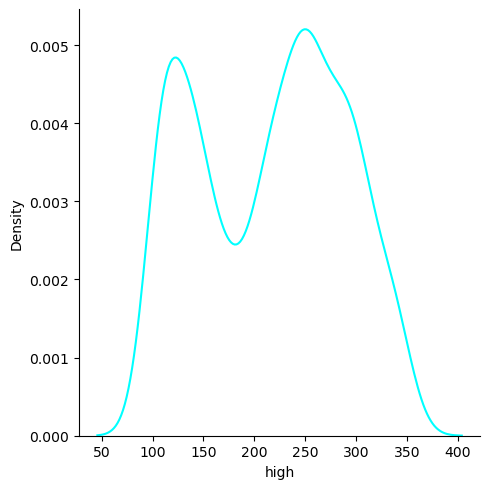

In [24]:
sns.displot(df2['high'],kind='kde',color='cyan')

## Feature Scaling : 

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
f_df=pd.DataFrame(df2['high'])
f_df.index=df2.index
minmax=MinMaxScaler()
f_df['high']=minmax.fit_transform(f_df)
f_df

,high
date,
2018-07-10 00:00:00+00:00,0.017909
2018-07-11 00:00:00+00:00,0.017239
2018-07-12 00:00:00+00:00,0.025404
2018-07-13 00:00:00+00:00,0.030099
2018-07-16 00:00:00+00:00,0.030966
...,...
2023-06-30 00:00:00+00:00,0.965523
2023-07-03 00:00:00+00:00,0.958304
2023-07-05 00:00:00+00:00,0.961262


## Train Test Split :

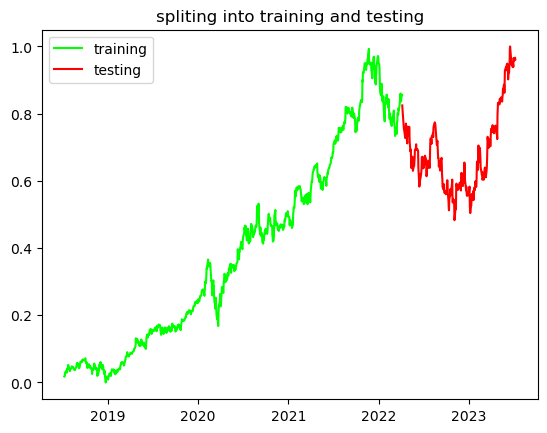

In [65]:
train_len=math.ceil(len(f_df)*0.75)
train_ds=f_df.iloc[0:train_len]
test_ds=f_df.iloc[train_len:]
plt.plot(train_ds.index,train_ds['high'],color='lime',label='training')
plt.plot(test_ds.index,test_ds['high'],color='red',label='testing')
plt.title('Spliting Into Training & Testing :')
plt.legend()
plt.show()

In [28]:
train_ds.shape,test_ds.shape

((943, 1), (314, 1))

In [29]:
trainx=pd.Series(train_ds['high'].values)
trainx.index=train_ds.index
window=50
x_train=[]
y_train=[]
y_train_ind=[]
for i in range(window,len(trainx)):
    x_train.append(trainx[i-window:i])
    y_train.append(trainx[i])
    y_train_ind.append(trainx.index[i])
x_train1=np.array(x_train) 
y_train1=np.array(y_train)
x_train1.shape,y_train1.shape    

((893, 50), (893,))

In [30]:
testx=pd.Series(test_ds['high'].values)
testx.index=test_ds.index
x_test=[]
y_test=[]
y_test_ind=[]
for t in range(window,len(testx)):
    x_test.append(testx[t-window:t])
    xx2=pd.Series(testx[t-window:t])
    y_test.append(testx[t])
    y_test_ind.append(testx.index[t])
x_test1=np.array(x_test)    
y_test1=np.array(y_test)
x_test1.shape,y_test1.shape

((264, 50), (264,))

In [31]:
x_train1=np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((893, 50, 1), (264, 50, 1), (893,), (264,))

In [32]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [33]:
pwd

'C:\\Users\\admin'

In [34]:
path='C:\\Users\\admin\\lstm_checkpoint-{epoch:02d}-{loss:.2f}.h5'
callback=ModelCheckpoint(filepath=path,monitor='val_loss',save_best_only=True,mode='min',verbose=1)

## Model Building (LSTM) :

In [35]:
model1=Sequential()
model1.add(LSTM(50,activation='relu',input_shape=(x_train1.shape[1],1)))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

In [36]:
H2=model1.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=100,callbacks=[callback])

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.1161
Epoch 1: val_loss improved from inf to 0.00789, saving model to C:\Users\admin\lstm_checkpoint-01-0.12.h5
28/28 [==============================] - 7s 83ms/step - loss: 0.1161 - val_loss: 0.0079
Epoch 2/100
27/28 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 2: val_loss improved from 0.00789 to 0.00192, saving model to C:\Users\admin\lstm_checkpoint-02-0.01.h5
28/28 [==============================] - 1s 51ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 3/100
27/28 [===========================>..] - ETA: 0s - loss: 0.0030
Epoch 3: val_loss did not improve from 0.00192
28/28 [==============================] - 2s 57ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/100
28/28 [==============================] - ETA: 0s - loss: 0.0017
Epoch 4: val_loss did not improve from 0.00192
28/28 [==============================] - 1s 37ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 5/100
28/28 [===============

## Training & Testing Loss : 

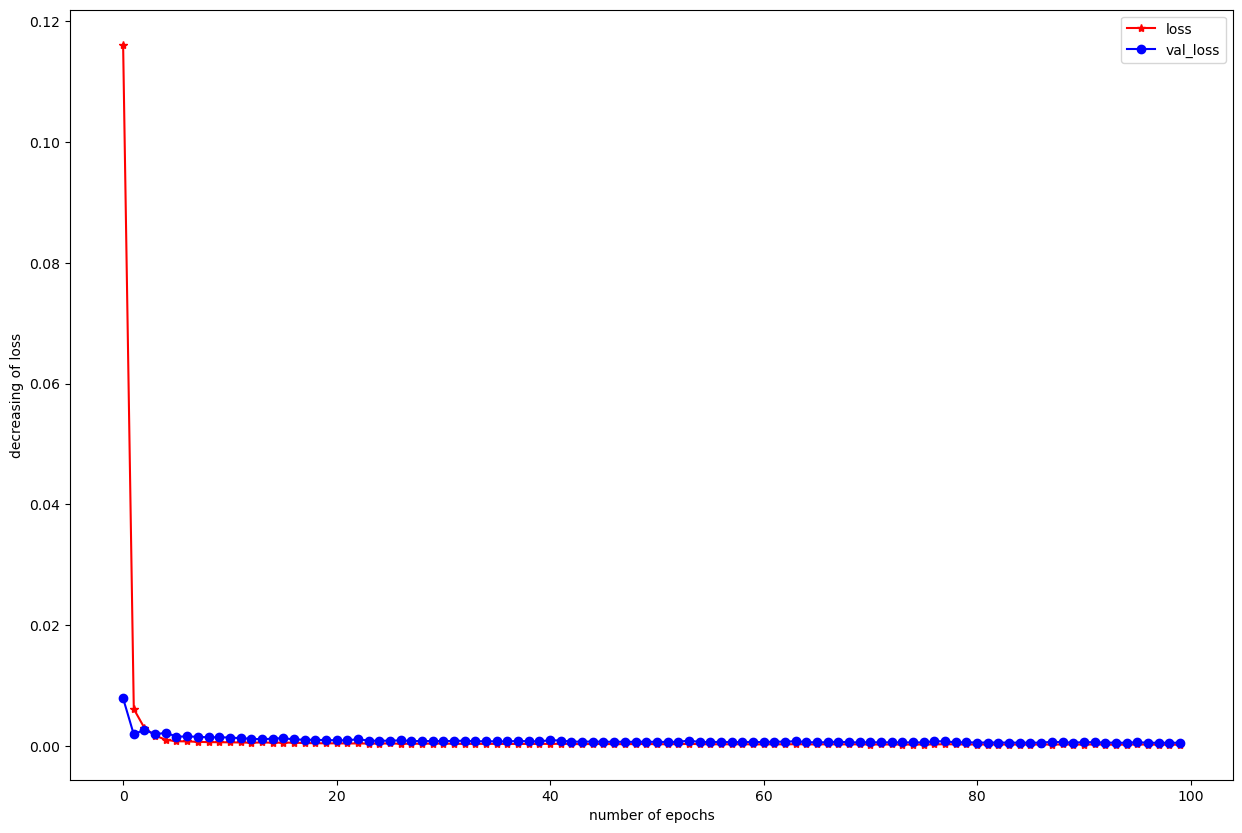

In [37]:
plt.figure(figsize=(15,10))
plt.plot(H2.epoch,H2.history['loss'],color='red',label='loss',marker='*')
plt.plot(H2.epoch,H2.history['val_loss'],color='blue',label='val_loss',marker='o')
plt.xlabel('Number of epochs')
plt.ylabel('Decreasing of loss')
plt.title('Loss & Val_loss :')
plt.legend()
plt.show()

In [49]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2=load_model("C:\\Users\\admin\\Downloads\\lstm_checkpoint-89-0.00.h5")

In [48]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pre=model2.predict(x_test1)

9/9 [==============================] - 0s 11ms/step


In [40]:
forcast=pd.DataFrame({'y_test':list(y_test),'y_pre':list(y_pre)})
data=minmax.inverse_transform(forcast)
dff=pd.DataFrame(data,columns=['Actual','Predicted'])
dff.index=y_test_ind
dff['daily_return-(actual)']=pd.DataFrame(dff['Actual'].pct_change())
dff['daily_rteturn-(predicted)']=pd.DataFrame(dff['Predicted'].pct_change())

In [41]:
tr=pd.DataFrame({'train':y_train})
tr=pd.DataFrame(minmax.inverse_transform(tr),columns=['train'])
tr.index=y_train_ind

## Forecasting :

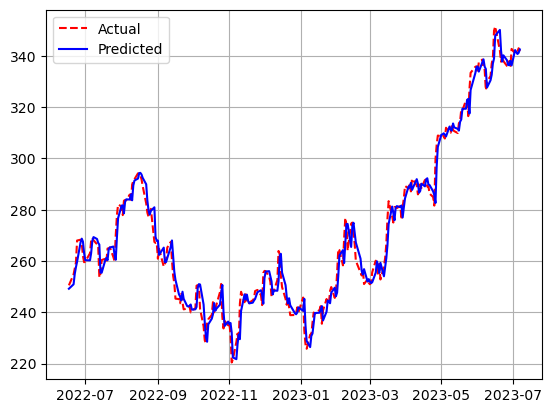

In [61]:
plt.plot(dff['Actual'],color='red',label='Actual',linestyle='--')
plt.plot(dff['Predicted'],color='blue',label='Predicted')
plt.legend()
plt.grid()
plt.show()

## Daily Return Actual vs Predicted :

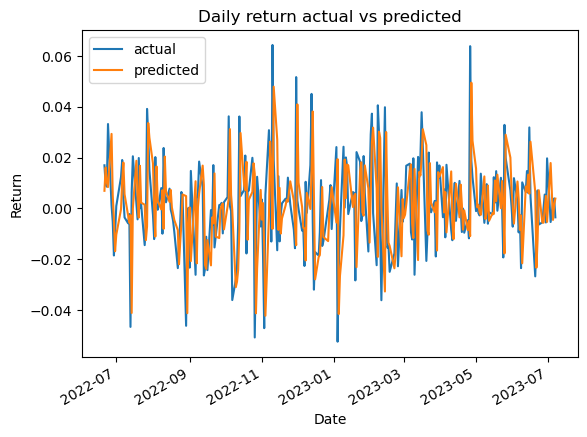

In [43]:
dff.iloc[1:,-2].plot(label='actual')
dff.iloc[1:,-1].plot(label='predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Daily Return Actual vs Predicted :')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(dff['Actual'],dff['Predicted'])
print('The mse value is = {}'.format(mse))
print('The rmse value is = {}'.format((mse)**(1/2)))

The mse value is = 22.57655393282882
The rmse value is = 4.751479131052647


In [45]:
model2.save('Microsoft_stocks.h5')

In [46]:
dff

,Actual,Predicted,daily_return-(actual),daily_rteturn-(predicted)
2022-06-17 00:00:00+00:00,250.50,249.174752,NaN,NaN
2022-06-21 00:00:00+00:00,254.75,250.901920,0.016966,0.006932
2022-06-22 00:00:00+00:00,257.17,254.936533,0.009500,0.016080
2022-06-23 00:00:00+00:00,259.37,257.544360,0.008555,0.010229
2022-06-24 00:00:00+00:00,267.98,259.708442,0.033196,0.008403
...,...,...,...,...
2023-06-30 00:00:00+00:00,342.73,336.267690,0.019696,-0.005306
2023-07-03 00:00:00+00:00,340.90,342.273464,-0.005339,0.017860
2023-07-05 00:00:00+00:00,341.65,340.729260,0.002200,-0.004512
2023-07-06 00:00:00+00:00,342.99,341.197557,0.003922,0.001374
